**Traffic Sign Classification**

Problem Statement:

> Creation of an automatic, fast and light system that is capable of real-time detection, classification and interpretation of the traffic signs.
<hr>

Project Repository : [Github](https://github.com/kashyapmanu/Traffic-Sign-Classification)
<hr>

Phase - 1 : Acquiring dataset and image augumentation

Presentation : [Goole Slides](https://docs.google.com/presentation/d/e/2PACX-1vRM33LhDg9fkFC4UhdfQucgzxjybKZmR_uvMEWy0zzqy-o3tL0Oiw31dPzbGf_HFQ/pub?start=false&loop=false&delayms=3000)

Report : [Google Docs](https://docs.google.com/document/d/e/2PACX-1vSsDqdW3WgbOEnPRPqi0nKLd6ci2sLO7HRg5EqfjTtGsDqhOoiFOcFwxw2immaFB4DeL4LZQ-un1cLG/pub)

<hr>

**Implementation**
<hr>

**Libraries**

Information about the required libraries

 - numpy  
NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
 - matplotlib
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
 - tensorflow
TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. Tensorflow is a symbolic math library based on dataflow and differentiable programming.
 - keras
 Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. Up until version 2.3 Keras supported multiple backends, including TensorFlow, Microsoft Cognitive Toolkit, R, Theano, and PlaidML.
	 - Sequential
	 `Sequential`  groups a linear stack of layers into a  `tf.keras.Model`.
`Sequential`  provides training and inference features on this model.
	 - Dense
	 Densely connected NN layer.
	 - Adam
	 Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
	 - to_categorical
	 Converts a class vector (integers) to binary class matrix.
	 - Dropout
	 Converts a class vector (integers) to binary class matrix.
	 - Flattern
	 Flattens the input. Does not affect the batch size.
	 - Conv2D
	 2D convolution layer (e.g. spatial convolution over images). This layer 	creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If  `use_bias`  is True, a bias vector is created and added to the outputs. Finally, if  `activation`  is not  `None`, it is applied to the outputs as well.
	 - MaxPooling 2D
	 Max pooling operation for 2D spatial data.
	 - ImagedataGenerator
	 Generates a `tf.data.Dataset` from image files in a directory.
 - cv2
 OpenCV is a library of programming functions mainly aimed at real-time computer vision. Originally developed by Intel, it was later supported by Willow Garage then Itseez. The library is cross-platform and free for use under the open-source Apache 2 License.
 - sklearn
 Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines.
 - pickle
 Used for serializing and deserializing python object structure.
 - os
The os module in pytthon provides functions for interacting with the operating system. Comes under the  python standard utlity modules.
 - pandas
 Fast, powerful, flexible and easy to use data analysis tool.
 - random
 Generates random float

In [1]:
#Importing all the required libraries

import numpy as np
import matplotlib.pyplot as plt#This is a visual plotting library for python. This is a visual extension of numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#Setting up the parameters

#The path for the data set
path = "myData"

#The path for the labels
labelFile = "labels.csv"

#Set the batch size to process together
batch_size_val = 50

#set the steps per epoch
steps_per_epoch = 2000
#30,000 images, 2000 steps per epoch, 50 bacth size = 30000/(50 * 2000) = 1.5

epochs_val = 10

#Setting the image dimensions
imageDimensions = (32, 32, 3)

#set the test ratio, here 20%
testRatio = 0.2

#Setting the validation ratio, 20%
validationRatio = 0.2

In [6]:
#Importing the images
count = 0 #stores the number of images in the dataset
images = [] #image list
classNo = [] #class list
imgCount = 0 #counter
myList = os.listdir(path) #This will list all the files and folders inside the folder containing dataset
print("Total classes detected: ",len(myList))
noOfClasses = len(myList)
print("Importing the classes....")
for x in range(0, (len(myList) - 1)): #traverse the directory, find and store the images and classes
    myPicList = os.listdir(path + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(count) + "/" + y)
        images.append(curImg)
        classNo.append(count)
        imgCount += 1
    print(count, end = " ")
    count += 1
print("\nTotal number of Images detected: ",imgCount)
images = np.array(images)
classNo = np.array(classNo)

Total classes detected:  44
Importing the classes....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 
Total number of Images detected:  34799


In [7]:
# Creating the split for train, test and validation from the data set
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
 
# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

In [8]:
#Validating the training and validation values created in the earlier code
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
#assert is a keyword that is used during debugging. It raises an AssertionError if the condition is not met.
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimensions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimensions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimensions))," The dimesionas of the Test images are wrong"

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


In [9]:
#Reading the CSV file containing class names
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


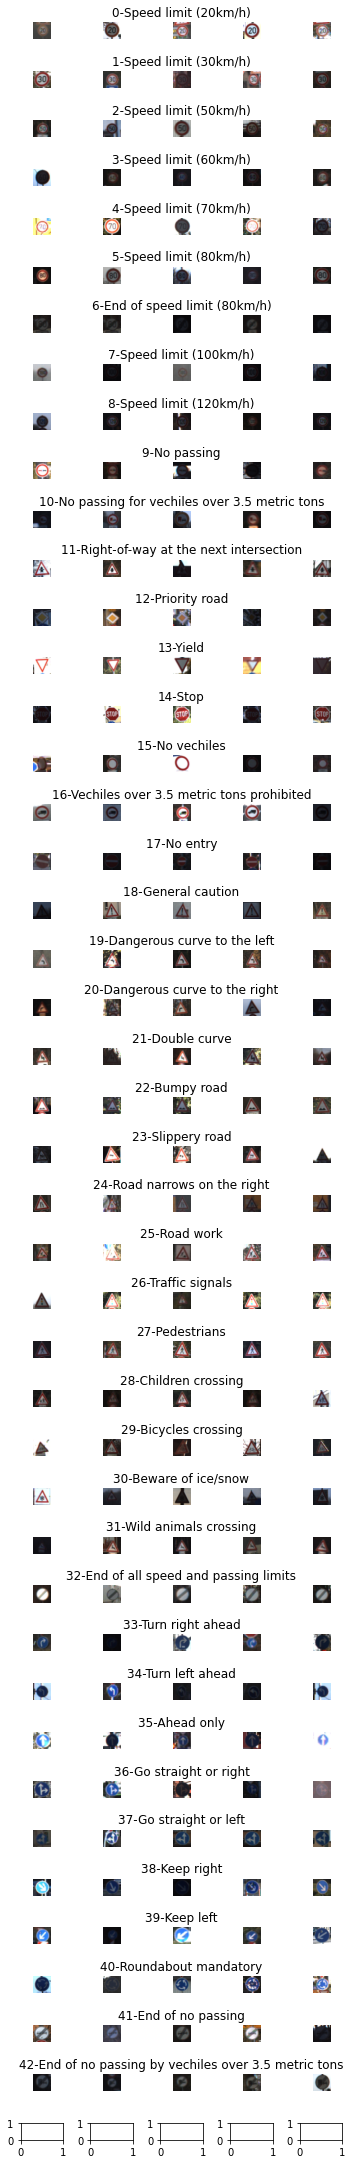

In [10]:
#Dispaying the sample images from all the classes
num_of_samples = []
cols = 5 #Number of sample images from each class
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 30))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))
 

[120, 1296, 1273, 814, 1156, 1054, 230, 827, 789, 861, 1155, 765, 1214, 1173, 441, 340, 235, 643, 675, 118, 187, 175, 211, 283, 134, 850, 327, 127, 319, 155, 223, 462, 133, 390, 239, 700, 198, 124, 1208, 159, 208, 137, 143]


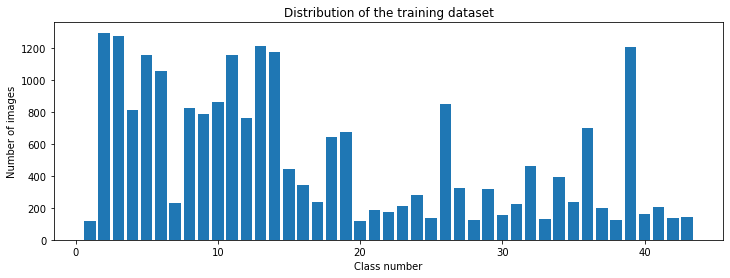

In [11]:
#Displaying the bar chart showing the distribution of the images
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(1, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [14]:
#Pre processing the mages
 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Converting the color space of the image
    return img
def equalize(img):
    img =cv2.equalizeHist(img) #Equalise the historgram of the images (standard ligting)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255            
    return img
 
X_train=np.array(list(map(preprocessing,X_train)))  # Iterate to do the pre processing on all the images
X_validation=np.array(list(map(preprocessing,X_validation))) #same for the validation and test set
X_test=np.array(list(map(preprocessing,X_test)))

In [15]:
#Adding a deapth of 1 to the images
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

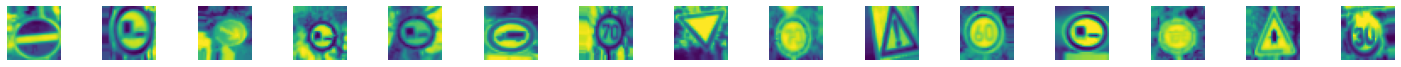

In [16]:
#Augumenting the image to make it more generic
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)
 
# Showing the augumented image samsples
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimensions[0],imageDimensions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)